In [1]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sec_2a import split_data
from sec_2d import CVgeneric
%matplotlib inline

In [2]:
train_X, _, test_X, train_y, _, test_y = split_data(val_ratio=0, split_method=1, random_state=0)

In [3]:
predict_y = (pd.Series(Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=35))])
             .fit(train_X[['NDAI', 'SD', 'CORR', 'angle_DF', 'angle_CF', 'angle_BF', 'angle_AF', 'angle_AN']], train_y)
             .predict_proba(test_X[['NDAI', 'SD', 'CORR', 'angle_DF', 'angle_CF', 'angle_BF', 'angle_AF', 'angle_AN']])[:, 1] >= 0.37142857142857144)
             .apply(lambda b: 1 if b else -1))

In [4]:
predict_y.index = test_y.index

df = test_X.loc[test_y != predict_y, :].copy()
df['label'] =  test_y.loc[test_y != predict_y]
df['predict'] =  predict_y.loc[test_y != predict_y]
df.head()

,x,y,NDAI,SD,CORR,angle_DF,angle_CF,angle_BF,angle_AF,angle_AN,source,label,predict
1218,48.0,71.0,3.565947,32.191391,0.094624,220.32355,205.00949,191.11389,177.709560,152.191760,1,1.0,-1
274163,287.0,182.0,0.126245,2.390636,0.126246,250.04857,228.10701,217.95624,206.871060,191.494380,3,1.0,-1
212013,12.0,321.0,2.748551,13.532590,0.252766,159.64769,163.50812,142.91759,121.356520,117.014450,2,-1.0,1
40948,50.0,175.0,2.469285,26.109493,0.469699,202.32188,124.00560,122.14883,92.491241,68.921700,1,-1.0,1
40951,53.0,175.0,2.435356,15.625008,0.352013,171.55649,143.94832,118.03313,80.312721,74.850815,1,-1.0,1


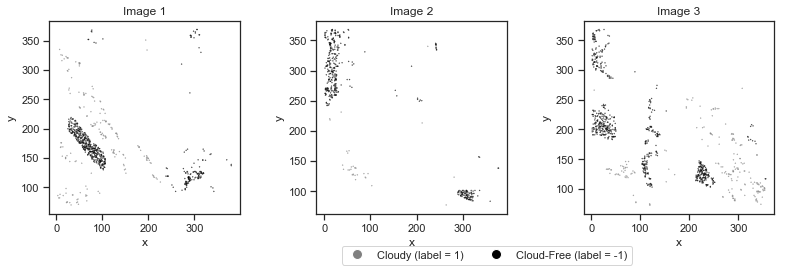

In [5]:
from sec_1b import label_plot

label_plot(df)

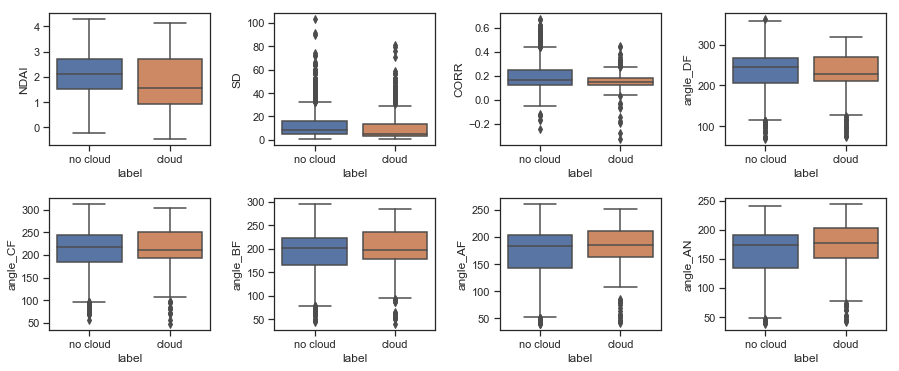

In [26]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4, bottom=0.25)

for i, col in enumerate(df.columns[2:-3], 1):    
    ax = fig.add_subplot(2, 4, i)
    sns.boxplot(x="label", y=col, data=df, ax=ax)
    ax.set_xticklabels(["no cloud", "cloud"])

In [46]:
import time

times = []
for count in range(35, len(train_X), 5000):
    start = time.time()
    sample_index = train_X.index.to_series().sample(count)
    features = ['NDAI', 'SD', 'CORR', 'angle_DF', 'angle_CF', 'angle_BF', 'angle_AF', 'angle_AN']
    predict_y = (pd.Series(Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=35))])
                 .fit(train_X.loc[sample_index][features], train_y.loc[sample_index])
                 .predict_proba(test_X[features])[:, 1] >= 0.37142857142857144)
                 .apply(lambda b: 1 if b else -1))
    end = time.time()
    times += [end - start]  

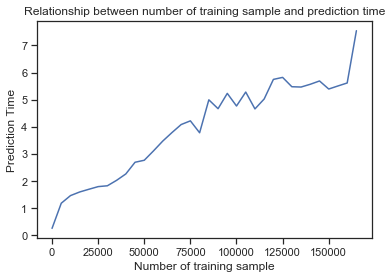

In [48]:
plt.plot(range(35, len(train_X), 5000), times)
plt.xlabel('Number of training sample')
plt.ylabel('Prediction Time') 
plt.title('Relationship between number of training sample and prediction time');

In [18]:
accuracy_scores = []
for count in range(35*5, len(train_X), 5000):
    sample_index = train_X.index.to_series().sample(count)
    features = ['NDAI', 'SD', 'CORR', 'angle_DF', 'angle_CF', 'angle_BF', 'angle_AF', 'angle_AN']
    predict_y = (pd.Series(Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=35))])
                 .fit(train_X.loc[sample_index][features], train_y.loc[sample_index])
                 .predict_proba(test_X[features])[:, 1] >= 0.37142857142857144)
                 .apply(lambda b: 1 if b else -1))
    accuracy_scores += [accuracy_score(test_y, predict_y)]


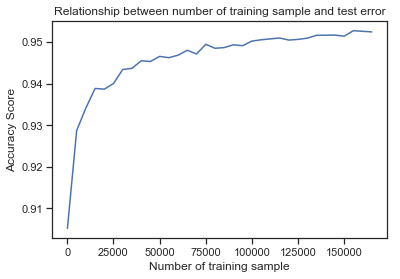

In [19]:
plt.plot(range(35, len(train_X), 5000), accuracy_scores)
plt.xlabel('Number of training sample')
plt.ylabel('Accuracy Score') 
plt.title('Relationship between number of training sample and test error');

In [20]:
sum([1 if a <0.95 else 0 for a in accuracy_scores])

20